In [60]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, DMatrix, cv, train, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import graphviz

### Read in data

In [48]:
gls = pd.read_csv(r'G:\REA\Working files\land-bidding\land_sales_full_data\feature eng\gls_1207_new_feat.csv')
gls = gls.sort_values(by=['year_launch', 'month_launch', 'date_launch'])

In [49]:
gls.columns

Index(['sg_gls_id', 'land_parcel_id', 'project_dwid', 'address_dwid',
       'date_launch', 'date_close', 'date_award', 'land_parcel',
       'land_parcel_std', 'street', 'zone', 'region', 'join_by', 'error_check',
       'site_area_sqm', 'devt_type', 'devt_class', 'lease_term', 'gpr',
       'gfa_sqm', 'num_bidders', 'successful_tenderer_name',
       'successful_tender_price', 'successful_price_psm_gfa', 'proj_name_raw',
       'proj_name_res', 'proj_name_non_res', 'in_db', 'source',
       'timediff_launch_to_close', 'timediff_close_to_award',
       'timediff_launch_to_award', 'launch_month_index', 'year_launch',
       'month_launch', 'day_launch', 'close_month_index', 'year_close',
       'month_close', 'day_close', 'award_month_index', 'year_award',
       'month_award', 'day_award', 'merge_key', 'tender_details',
       'tenderer_name_1st', 'tender_price_1st', 'price_psm_gfa_1st',
       'tenderer_name_2nd', 'tender_price_2nd', 'price_psm_gfa_2nd',
       'price_premium_total',

In [50]:
# select features
categories = ['region', 'zone', 'devt_class', 'source']
numeric = ['site_area_sqm', 'lease_term', 'gpr',
           'num_bidders', 'timediff_launch_to_close',
           'avg_dist_cbd', 'avg_dist_mrt', 'avg_num_bus',
           'avg_num_good_sch', 'proj_num_of_units', 'proj_max_floor',
           'num_of_nearby_completed_proj_200m', 'num_of_schools']
cols = categories + numeric

### Pretreatment

In [51]:
x = pd.get_dummies(gls[cols])
y = gls.price_psm_real

In [52]:
dmat = DMatrix(data=x, label=y)

### Split train-test

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, test_size=0.2)

### Set model and regress

In [54]:
xg_reg = XGBRegressor(objective ='reg:squarederror',
                      colsample_bytree = 0.3,
                      learning_rate = 0.1,
                      max_depth = 5,
                      alpha = 10,
                      n_estimators = 10)
xg_reg.fit(x_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [55]:
pred = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" %rmse)

RMSE: 1381.430969


### Cross validation

In [58]:
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}

validation_res = cv(dtrain=dmat, params=params, nfold=3, num_boost_round=100,
                    early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=42)

In [59]:
validation_res['test-rmse-mean'].tail(1)

72    1040.836671
Name: test-rmse-mean, dtype: float64

### Visualize

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

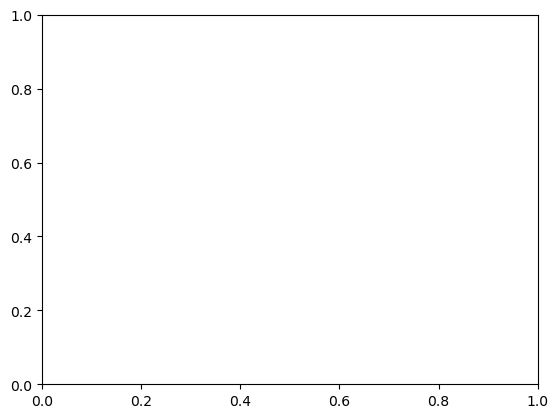

In [61]:
xg_reg = train(params=params, dtrain=dmat, num_boost_round=100)
plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()